# **Facial recognition based Product recommendation system using past purchases**

# **Import library's**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# **Read the data set**

In [564]:
df = pd.read_csv('amazon.csv',encoding='latin')

In [565]:
df.head()

,sub_category,image,actual_price,name
0,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,"â?58,990",Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...
1,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,"â?75,990",LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...
2,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,"â?61,990",LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...
3,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,"â?68,990",LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...
4,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,"â?67,790",Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...


In [566]:
df.tail()

,sub_category,image,actual_price,name
2634,T-shirts & Polos,https://m.media-amazon.com/images/W/IMAGERENDE...,"â?1,399",HeraDawn Cottonblend Mens Printed Oversized T-...
2635,T-shirts & Polos,https://m.media-amazon.com/images/W/IMAGERENDE...,NaN,HF RIGHT Military Army Commando Full Sleeve T-...
2636,T-shirts & Polos,https://m.media-amazon.com/images/W/IMAGERENDE...,"â?1,699",Levi's Men's Slim Fit Polo
2637,T-shirts & Polos,https://m.media-amazon.com/images/W/IMAGERENDE...,â?799,Classic Polo Mens Solid Half Sleeve 100% Cotto...
2638,T-shirts & Polos,https://m.media-amazon.com/images/W/IMAGERENDE...,"â?1,999",MPL Sports Team India Retro Limited Over Jerse...


# **EDA**

In [567]:
df.shape

(2639, 4)

In [568]:
df.dtypes

sub_category    object
image           object
actual_price    object
name            object
dtype: object

In [569]:
# check a nill values
df.isnull().sum()

sub_category     0
image            0
actual_price    33
name             0
dtype: int64

In [570]:
# chech the duplicate  values
df.duplicated().T

0       False
1       False
2       False
3       False
4       False
        ...  
2634    False
2635    False
2636    False
2637    False
2638    False
Length: 2639, dtype: bool

In [571]:
# Describe thet data
df.describe().T

,count,unique,top,freq
sub_category,2639,12,T-shirts & Polos,499
image,2639,2538,https://m.media-amazon.com/images/I/712Brp0hwf...,8
actual_price,2606,693,â?999,210
name,2639,2468,crocs unisex-adult Bayaband Clog LEMON/WHITE C...,13


In [572]:
# information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sub_category  2639 non-null   object
 1   image         2639 non-null   object
 2   actual_price  2606 non-null   object
 3   name          2639 non-null   object
dtypes: object(4)
memory usage: 82.6+ KB


In [573]:
df.duplicated().sum()

7

In [574]:
df.notnull().sum()

sub_category    2639
image           2639
actual_price    2606
name            2639
dtype: int64

In [575]:
for i in df.columns:
    print(i +'    -------->:'+str(type(i)))

sub_category    -------->:<class 'str'>
image    -------->:<class 'str'>
actual_price    -------->:<class 'str'>
name    -------->:<class 'str'>


<Axes: xlabel='actual_price', ylabel='Count'>

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 137 (\x89) missing from current font.

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 137 (\x89) missing from current font.



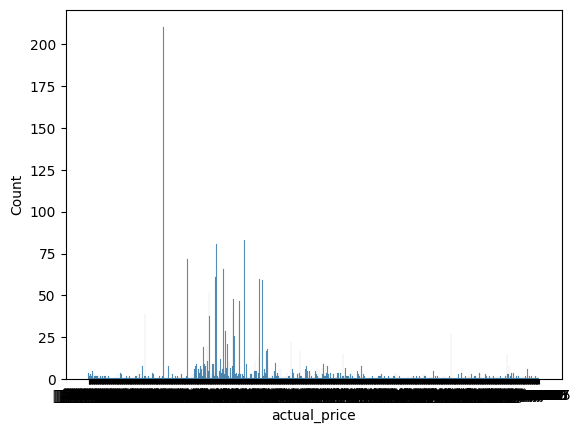

In [576]:
# histplot of actual_price column
sns.histplot(df['actual_price'])

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



___________________________________________________
The null values of dataset sub_category     0
image            0
actual_price    33
name             0
dtype: int64
___________________________________________________


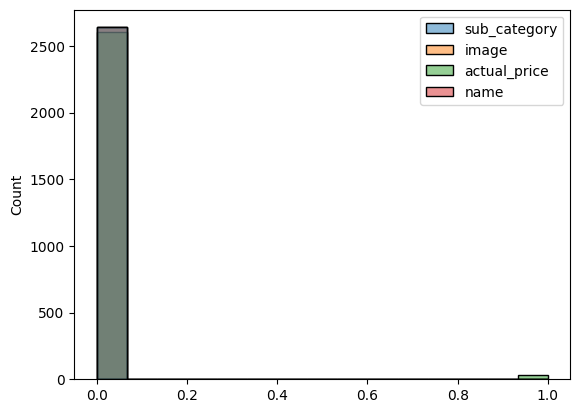

In [577]:
sns.histplot(df.isnull())
print('___________________________________________________')
print("The null values of dataset"+' '+str(df.isnull().sum()))
print('___________________________________________________')

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



___________________________________________________
The duplicated values of dataset 7
___________________________________________________


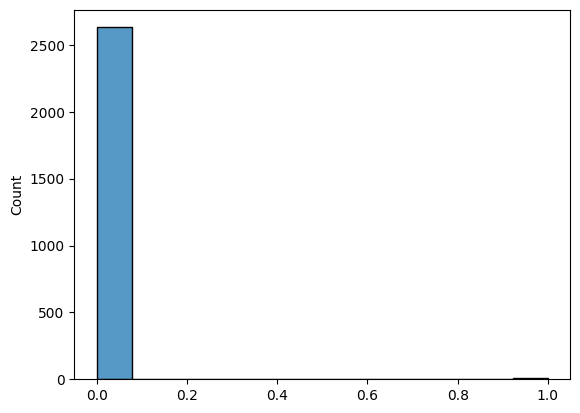

In [578]:
sns.histplot(df.duplicated())
print('___________________________________________________')
print("The duplicated values of dataset"+' '+str(df.duplicated().sum()))
print('___________________________________________________')

In [579]:
df.columns

Index(['sub_category', 'image', 'actual_price', 'name'], dtype='object')

count    2639.000000
mean       71.134521
std        15.073829
min        62.000000
25%        62.000000
50%        62.000000
75%        96.000000
max        96.000000
Name: image_url_length, dtype: float64


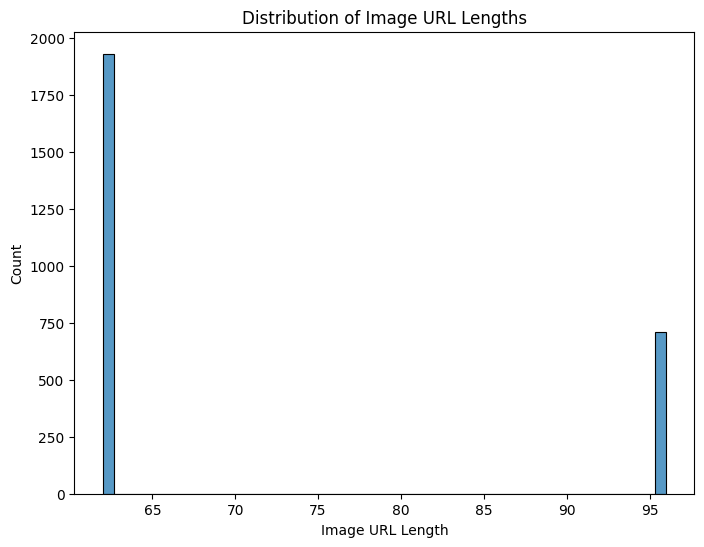

In [580]:
# Convert the values in "image_url" column to strings and calculate lengths
df["image_url_length"] = df["image"].astype(str).apply(len)

# Check summary statistics of image_url lengths
print(df["image_url_length"].describe())

# Plot the distribution of image_url lengths
plt.figure(figsize=(8, 6))
sns.histplot(df["image_url_length"], bins=50)
plt.title("Distribution of Image URL Lengths")
plt.xlabel("Image URL Length")
plt.ylabel("Count")
plt.show()

In [581]:
import plotly.express as px
from plotly import graph_objects as go

In [582]:
fig = px.histogram(df, x='actual_price', template='plotly_white', title='actual_price')
fig.update_xaxes(categoryorder='category descending', title='actual_price').update_yaxes(title='URL')
fig.show()

In [583]:
fig = px.bar(df[:10], x='actual_price', y='image', title='label', template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'})
fig.show()

In [584]:
fig = px.bar(df[:10], x='name', y='image', title='label', template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'})
fig.show()

In [585]:
fig = px.bar(df[:10], x='sub_category', y='image', title='label', template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'})
fig.show()

# **Pre-processig**

In [586]:
df.columns

Index(['sub_category', 'image', 'actual_price', 'name', 'image_url_length'], dtype='object')

In [587]:
df = df[['name','image','actual_price']]

In [588]:
df.head()

,name,image,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,https://m.media-amazon.com/images/I/31UISB90sY...,"â?58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,https://m.media-amazon.com/images/I/51JFb7FctD...,"â?75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,https://m.media-amazon.com/images/I/51JFb7FctD...,"â?61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,https://m.media-amazon.com/images/I/51JFb7FctD...,"â?68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,https://m.media-amazon.com/images/I/41lrtqXPiW...,"â?67,790"


In [589]:
df.isnull().sum()

name             0
image            0
actual_price    33
dtype: int64

In [590]:
df.bfill(inplace=True)

In [591]:
df.isnull().sum()

name            0
image           0
actual_price    0
dtype: int64

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          2639 non-null   object
 1   image         2639 non-null   object
 2   actual_price  2639 non-null   object
dtypes: object(3)
memory usage: 62.0+ KB


In [593]:
unknown_symbol = 'â?'
df['actual_price'] = df['actual_price'].apply(lambda x: x.replace(unknown_symbol, ''))

In [594]:
df.head()

,name,image,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,https://m.media-amazon.com/images/I/31UISB90sY...,"58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,https://m.media-amazon.com/images/I/51JFb7FctD...,"75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,https://m.media-amazon.com/images/I/51JFb7FctD...,"61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,https://m.media-amazon.com/images/I/51JFb7FctD...,"68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,https://m.media-amazon.com/images/I/41lrtqXPiW...,"67,790"


In [595]:
df.tail()

,name,image,actual_price
2634,HeraDawn Cottonblend Mens Printed Oversized T-...,https://m.media-amazon.com/images/W/IMAGERENDE...,"1,399"
2635,HF RIGHT Military Army Commando Full Sleeve T-...,https://m.media-amazon.com/images/W/IMAGERENDE...,"1,699"
2636,Levi's Men's Slim Fit Polo,https://m.media-amazon.com/images/W/IMAGERENDE...,"1,699"
2637,Classic Polo Mens Solid Half Sleeve 100% Cotto...,https://m.media-amazon.com/images/W/IMAGERENDE...,799
2638,MPL Sports Team India Retro Limited Over Jerse...,https://m.media-amazon.com/images/W/IMAGERENDE...,"1,999"


In [596]:
data = df

In [597]:
data.head()

,name,image,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,https://m.media-amazon.com/images/I/31UISB90sY...,"58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,https://m.media-amazon.com/images/I/51JFb7FctD...,"75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,https://m.media-amazon.com/images/I/51JFb7FctD...,"61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,https://m.media-amazon.com/images/I/51JFb7FctD...,"68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,https://m.media-amazon.com/images/I/41lrtqXPiW...,"67,790"


In [598]:
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

In [599]:
df.dtypes

name             object
image            object
actual_price    float64
dtype: object

In [600]:
data.columns

Index(['name', 'image', 'actual_price'], dtype='object')

In [601]:
df.isnull().sum()

name               0
image              0
actual_price    1411
dtype: int64

In [602]:
df.bfill(inplace=True)
df.ffill(inplace=True)

In [603]:
df.isnull().sum()

name            0
image           0
actual_price    0
dtype: int64

# **RECOMENDATION**

In [604]:
from sklearn.neighbors import NearestNeighbors
# Find unique  names
data = df
unique_name = data['name'].unique()

# Create a dictionary to map author names to numerical values
name_to_numeric = {name: idx for idx, name in enumerate(unique_name)}
# Convert author names to numerical values
data['name_numeric'] = data['name'].map(name_to_numeric)

k = 11  # Number of neighbors, including the item itself
knn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn_model.fit(data[['name_numeric', 'actual_price']])



NearestNeighbors(metric='euclidean', n_neighbors=11)

In [630]:
df['name'][1451]

'Genie Unicorn School Bags for Girls - 3 compartments | Stylish and Trendy College Bag for Girls | Easy to Carry Backpacks ...'

In [644]:
from sklearn.neighbors import NearestNeighbors

# Find unique names
data = df
unique_name = data['name'].unique()

# Create a dictionary to map author names to numerical values
name_to_numeric = {name: idx for idx, name in enumerate(unique_name)}
# Convert author names to numerical values
data['name_numeric'] = data['name'].map(name_to_numeric)

k = 11  # Number of neighbors, including the item itself
knn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn_model.fit(data[['name_numeric', 'actual_price']])

# User input
user_name = 'lg'

# Filter products containing the user input in their name
filtered_products = data[data['name'].str.contains(user_name, case=False)]

if filtered_products.empty:
    print("No products with the specified keyword found.")
else:
    # Sort the filtered products by a relevant criterion (e.g., cost) and get the top 15
    top_15_products = filtered_products.sort_values(by='actual_price')[:15]

    # Get recommended product names, costs, and images from the top 15 products
    recommended_product_names = top_15_products['name'].tolist()
    recommended_product_costs = top_15_products['actual_price'].tolist()
    recommended_product_images = top_15_products['image'].tolist()


In [651]:
recommended_product_names

['Colgate Kids Strawberry 40g Toothpaste, Cavity Protection',
 'JASDONE å¨ Heavy Duty Adjustable Top Load Washing Machine Stand Trolley Compatible for LG 6kg, 6.5kg, 7kg, 7.5kg, 8kg,9kg, ...',
 'LG Asafoetida Powder, 100 g',
 'Paper Boat Panipuri Pellets I Hygienic & Tasty I Ready to Fry I Golgappe, 400g',
 'Colgate Active Salt Toothpaste, Germ Fighting Toothpaste for Healthy Gums and Teeth, 500gm (200g X 2 and 100g X 1)',
 'Dabur Vedic Tea - 500gm | Handpicked from Assam, Nilgiri & Darjeeling | Soulful Aroma & Rich Taste | 30+ Ayurvedic Herbs |...',
 'Foodie Puppies Siphon Pump for Aquarium/Fish Tank Cleaning Tool Without Valve Algae Scrapers & Fish Tank Gravel Cleaner -...',
 'Liberty Gliders OLGREEN Mens Non-Leather Casual Shoes',
 'PILGRIM Korean 5% Vitamin C Face Serum (Oil Based) for glowing skin with Hyaluronic acid | Vitamin c serum for radiant ski...',
 'Colgate Barbie Toothbrush for kids, Battery Powered Electric Toothbrush, Age 3+, Kids toothbrush with Extra Soft Bristles ..

In [653]:
recommended_product_costs

[62.0,
 149.0,
 165.0,
 200.0,
 282.0,
 295.0,
 399.0,
 499.0,
 550.0,
 599.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0]

In [655]:
recommended_product_images

['https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/613ihx25FJL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/6138mra1vGL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/41BRTVTgr2L._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/61TWHgzjIDL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61eDZAMqhnL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/61DMPchFPLL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/716WunDd3pL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/81enUqS449L._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/51Q0+yjd9hL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61+hcUhtYoL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/51lyOjfKhML._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/51lyOjfKhML._AC_UL320

In [652]:
recommended_product_names[1]

'JASDONE å¨ Heavy Duty Adjustable Top Load Washing Machine Stand Trolley Compatible for LG 6kg, 6.5kg, 7kg, 7.5kg, 8kg,9kg, ...'

In [654]:
recommended_product_costs[1]

149.0

In [656]:
recommended_product_images[1]

'https://m.media-amazon.com/images/I/6138mra1vGL._AC_UL320_.jpg'

In [32]:
df = pd.read_csv('T-shirts and Polos.csv',encoding='latin')

In [33]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Allen Solly Men's Regular Fit Polo,men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/I/71eUwDk8z+...,https://www.amazon.in/Allen-Solly-Regular-AMKP...,4.1,"60,020",â¹590,"â¹1,099"
1,Van Heusen Men's Regular Fit Polo Shirt,men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/I/71ISzvgAl2...,https://www.amazon.in/Van-Heusen-Solid-Regular...,4.0,"28,727",â¹550,"â¹1,099"
2,Scott International Men's Regular Fit T-Shirt ...,men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/I/71HBNT3R66...,https://www.amazon.in/Scott-International-SS20...,3.7,"36,734",â¹523,"â¹2,397"
3,TOPLOT T-Shirt for Men||T Shirt||White T-Shirt...,men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/I/71GITfTSeR...,https://www.amazon.in/TOPLOT-T-Shirt-Regular-P...,4.5,51,â¹299,"â¹1,999"
4,Amazon Brand - Symbol Men's Regular Polo Shirt,men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/I/51K0XmUVDP...,https://www.amazon.in/Amazon-Brand-Symbol-Regu...,3.9,"21,352",â¹309,"â¹1,099"


In [34]:
df.isnull().sum()

name                 0
main_category        0
sub_category         0
image                0
link                 0
ratings           6147
no_of_ratings     6147
discount_price    1494
actual_price       362
dtype: int64

In [35]:
df.ffill(inplace=True)

In [36]:
df.isnull().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [37]:
df = df[['name','image','actual_price']]

In [38]:
unknown_symbol = 'â¹'
df['actual_price'] = df['actual_price'].apply(lambda x: x.replace(unknown_symbol, ''))

In [39]:
df['actual_price'] = df['actual_price'].replace(',', '', regex=True).astype(float)

In [40]:
df.head()

,name,image,actual_price
0,Allen Solly Men's Regular Fit Polo,https://m.media-amazon.com/images/I/71eUwDk8z+...,1099.0
1,Van Heusen Men's Regular Fit Polo Shirt,https://m.media-amazon.com/images/I/71ISzvgAl2...,1099.0
2,Scott International Men's Regular Fit T-Shirt ...,https://m.media-amazon.com/images/I/71HBNT3R66...,2397.0
3,TOPLOT T-Shirt for Men||T Shirt||White T-Shirt...,https://m.media-amazon.com/images/I/71GITfTSeR...,1999.0
4,Amazon Brand - Symbol Men's Regular Polo Shirt,https://m.media-amazon.com/images/I/51K0XmUVDP...,1099.0


In [41]:
df.head()

,name,image,actual_price
0,Allen Solly Men's Regular Fit Polo,https://m.media-amazon.com/images/I/71eUwDk8z+...,1099.0
1,Van Heusen Men's Regular Fit Polo Shirt,https://m.media-amazon.com/images/I/71ISzvgAl2...,1099.0
2,Scott International Men's Regular Fit T-Shirt ...,https://m.media-amazon.com/images/I/71HBNT3R66...,2397.0
3,TOPLOT T-Shirt for Men||T Shirt||White T-Shirt...,https://m.media-amazon.com/images/I/71GITfTSeR...,1999.0
4,Amazon Brand - Symbol Men's Regular Polo Shirt,https://m.media-amazon.com/images/I/51K0XmUVDP...,1099.0


In [45]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming 'df' is your DataFrame containing product information

# Text Preprocessing - Convert 'name' to numerical representation
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['name'])

k = 11  # Number of neighbors, including the item itself
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine')
knn_model.fit(tfidf_matrix)

# User input
user_name = 'red'

# Filter products containing the user input in their name
filtered_products = df[df['name'].str.contains(user_name, case=False)]

if filtered_products.empty:
    print("No products with the specified keyword found.")
else:
    # Text Preprocessing for user input
    user_tfidf = tfidf.transform([user_name])

    # Calculate cosine similarity between user input and all products
    similarities, indices = knn_model.kneighbors(user_tfidf)

    # Get top similar products to the user input
    similar_products_indices = indices.flatten()
    similar_products = df.iloc[similar_products_indices]

    # Sort the filtered products by cost and get the top 15
    top_15_products = similar_products.sort_values(by='actual_price').head(15)

    # Get recommended product names, costs, and images from the top 15 products
    recommended_product_names = top_15_products['name'].tolist()
    recommended_product_costs = top_15_products['actual_price'].tolist()
    recommended_product_images = top_15_products['image'].tolist()

    # You can then use these recommended lists as needed


In [46]:
recommended_product_names

['Red Tape Men T-Shirt',
 'Red Tape Men T-Shirt',
 'Red Tape Men T-Shirt',
 'Red Tape Men T-Shirt',
 'Red Tape Men T-Shirt',
 'Red Tape Men T-Shirt',
 'Red Tape Men Red Collared T-Shirt',
 'Red Tape Men T-Shirt',
 'Red Tape Men T-Shirt',
 'Red Tape Men T-Shirt',
 'Red Tape Men T-Shirt']

In [47]:
recommended_product_images

['https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/715mXcnJi5L._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/71WbO6pQGqL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/61CipIzY4mL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/61sxbvWxA2L._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/61Sg0mOEJ1L._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/61MMWwBIu5L._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/71fWIJQXcNL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/71hPZASt-DL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/71XueW-sMVL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61NiztVBB-L._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/71XueW-sMVL._AC_UL320_.jpg']

In [48]:
recommended_product_costs

[1299.0,
 1399.0,
 1799.0,
 1799.0,
 1999.0,
 2099.0,
 2399.0,
 2599.0,
 2599.0,
 2599.0,
 2599.0]